In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

RDKit WARNING: [23:29:04] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
mol = Chem.MolFromSmiles("c1ccccc1")

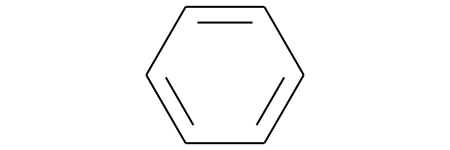

In [4]:
mol

In [26]:
!ls

Untitled.ipynb     table_edit.csv     table_s1.csv
ch05_compounds.sdf table_edit.xls     table_s1.xlsx


In [3]:
mols = Chem.SDMolSupplier("ch05_compounds.sdf")

In [4]:
len(mols)

34

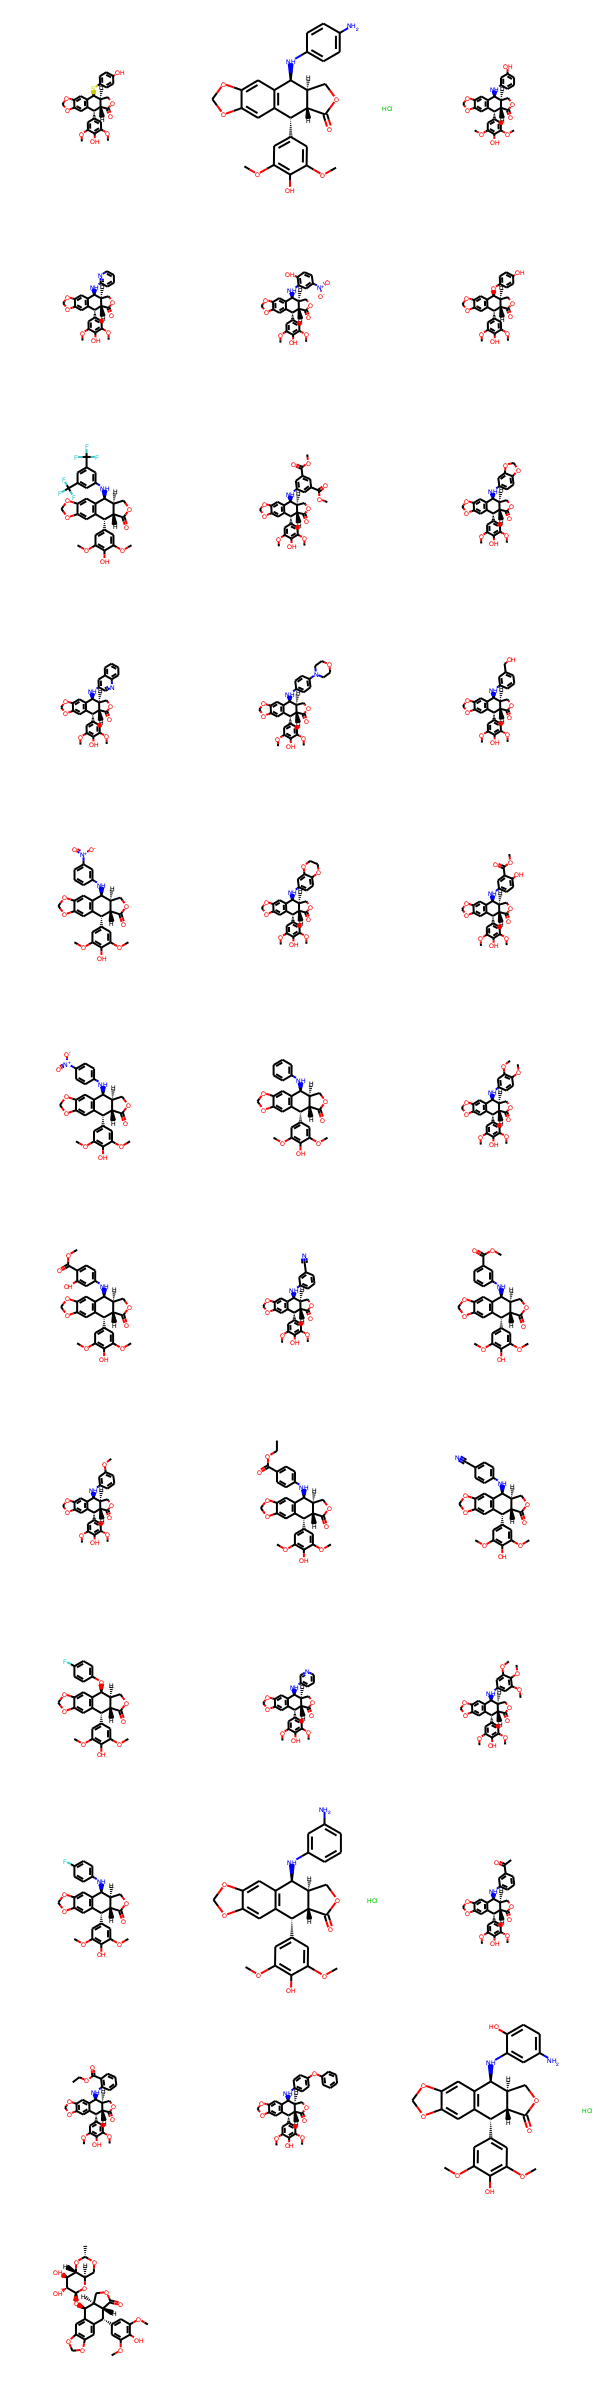

In [5]:
Draw.MolsToGridImage(mols)

# csvをdataframeで読み込む

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("table_edit.csv")

In [45]:
def missingval_table(df):
    mv_df = pd.DataFrame(df.isnull().sum())
    mv_df = mv_df.rename(columns={0:'null count'})
    mv_df['null count(%)'] = mv_df['null count']/len(df)*100
    mv_df['variation'] = df.nunique().values
    mv_df['variation(%)'] = df.nunique().values/len(df)*100
    return mv_df

In [50]:
df = df.iloc[:795, :5]

In [51]:
missingval_table(df)

,null count,null count(%),variation,variation(%)
No.,0,0.0,795,100.000000
Compound ID,0,0.0,725,91.194969
SMILES,0,0.0,723,90.943396
Assay ID,0,0.0,7,0.880503
LogP app,0,0.0,297,37.358491


In [52]:
df.to_csv('dataset.csv')

# SMILES式に空白があったので埋める

In [53]:
import pandas as pd
df = pd.read_csv('dataset.csv')

In [54]:
df.head()

,Unnamed: 0,No.,Compound ID,SMILES,Assay ID,LogP app
0,0,1.0,CHEMBL121893,[N@H+]2(CCCCC2)CCC(=O)c1ccc(OCCCCCC)cc1,CHEMBL1034536,-2.67
1,1,2.0,CHEMBL538150,C(=O)(c1cc2c(cc(OCCCCCC)cc2)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.85
2,2,3.0,CHEMBL539139,C(=O)(c1ccc(OCCOCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.80
3,3,4.0,CHEMBL539393,C(=O)(c1cc(C)c(OCCCCCC)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.91
4,4,5.0,CHEMBL539718,C(=O)(c1c(Cl)cc(SCCCCCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.22


In [59]:
seri = df['SMILES']
for i, v in df['SMILES'].iteritems():
    if(' 'in v):
        print(i)
        print(v)
        df.at[i, 'SMILES'] = v.replace(' ', '')
        

In [56]:
df['SMILES'] = seri

In [57]:
print(df.at[130, 'SMILES'])

N3[C@@](C[C@@](C)C)C(N[C@](C[C@@](C)C)C(N[C@@](C[C@@](C)C)C(N[C@@](C[C@@](C)C)C(N1[C@](CCC1)C(N[C@@](Cc2ccc(O)cc2)C3=O)=O)=O)=O)=O)=O


In [58]:
df.to_csv('dataset2.csv')